In [ ]:
import torch
import matplotlib.pyplot as plt
import os
import matplotlib.gridspec as gridspec

In [2]:
def load_checkpoint(file_path):
    checkpoint = torch.load(file_path, map_location='cpu')
    return {
        'train_losses': checkpoint['train_losses'],
        'val_losses': checkpoint['val_losses'],
        'val_accs': checkpoint['val_accs'],
        'recalls': checkpoint['recalls'],
        'precisions': checkpoint['precisions'],
        'rocs': checkpoint['rocs'],
        'epoch': checkpoint['epoch']
    }

checkpoint_path_512 = r"C:\Users\gluzk\source\repos\CS2_cheat_detection\Transformer\checkpoints\model_512_epoch_99.pth"
checkpoint_path_1024 = r"C:\Users\gluzk\source\repos\CS2_cheat_detection\Transformer\checkpoints\model_1024_epoch_99.pth"
checkpoint_path_1024_seed41 = r"C:\Users\gluzk\source\repos\CS2_cheat_detection\Transformer\checkpoints\model_1024_seed41_epoch_39.pth"
checkpoint_path_1024_seed43 = r"C:\Users\gluzk\source\repos\CS2_cheat_detection\Transformer\checkpoints\model_1024_seed43_epoch_39.pth"
metrics_512 = load_checkpoint(checkpoint_path_512)
metrics_1024 = load_checkpoint(checkpoint_path_1024)
metrics_1024_seed43 = load_checkpoint(checkpoint_path_1024_seed43)
metrics_1024_seed41 = load_checkpoint(checkpoint_path_1024_seed41)

In [32]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def plot_metrics(metrics, title=None):
    epochs = list(range(1, len(metrics['train_losses']) + 1))

    fig = plt.figure(figsize=(10, 12))
    if title:
        fig.suptitle(title, fontsize=16)

    # Create custom layout: 3 rows, 2 columns
    gs = gridspec.GridSpec(3, 2, figure=fig)

    # 1. Loss - spans the entire top row
    ax1 = fig.add_subplot(gs[0, :])
    ax1.plot(epochs, metrics['train_losses'], label='Train Loss')
    ax1.plot(epochs, metrics['val_losses'], label='Val Loss')
    ax1.set_title("Loss")
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Loss")
    ax1.grid(True)
    ax1.legend()

    # 2. Accuracy
    ax2 = fig.add_subplot(gs[1, 0])
    ax2.plot(epochs, metrics['val_accs'], label='Val Accuracy', color='green')
    ax2.set_title("Validation Accuracy")
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("Accuracy")
    ax2.grid(True)
    ax2.legend()

    # 3. Recall
    ax3 = fig.add_subplot(gs[1, 1])
    ax3.plot(epochs, metrics['recalls'], label='Recall', color='orange')
    ax3.set_title("Recall")
    ax3.set_xlabel("Epoch")
    ax3.set_ylabel("Recall")
    ax3.grid(True)
    ax3.legend()

    # 4. Precision
    ax4 = fig.add_subplot(gs[2, 0])
    ax4.plot(epochs, metrics['precisions'], label='Precision', color='purple')
    ax4.set_title("Precision")
    ax4.set_xlabel("Epoch")
    ax4.set_ylabel("Precision")
    ax4.grid(True)
    ax4.legend()

    # 5. ROC AUC
    ax5 = fig.add_subplot(gs[2, 1])
    ax5.plot(epochs, metrics['rocs'], label='ROC AUC', color='red')
    ax5.set_title("ROC AUC")
    ax5.set_xlabel("Epoch")
    ax5.set_ylabel("ROC AUC")
    ax5.grid(True)
    ax5.legend()

    # Adjust layout to fit everything nicely
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()


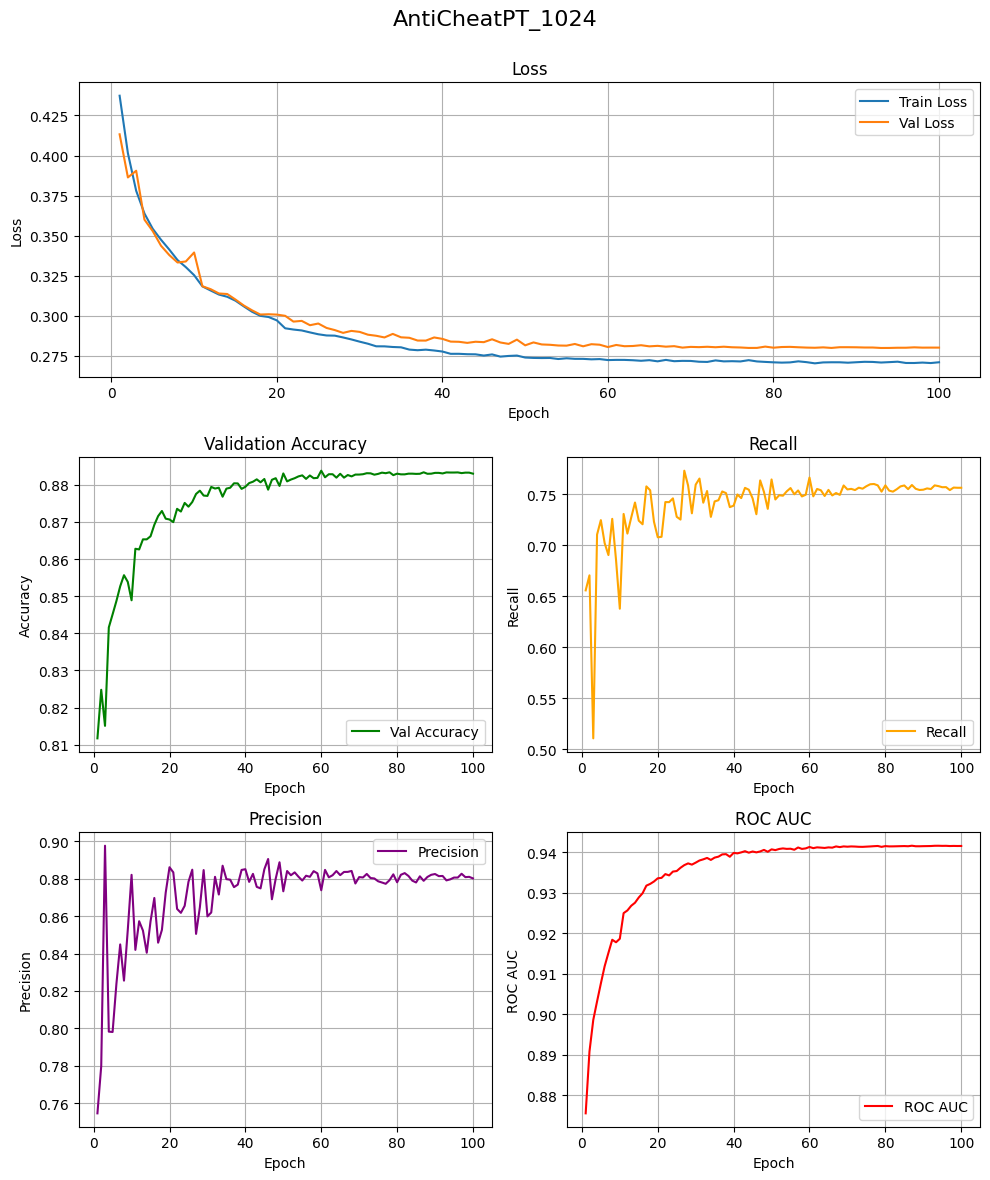

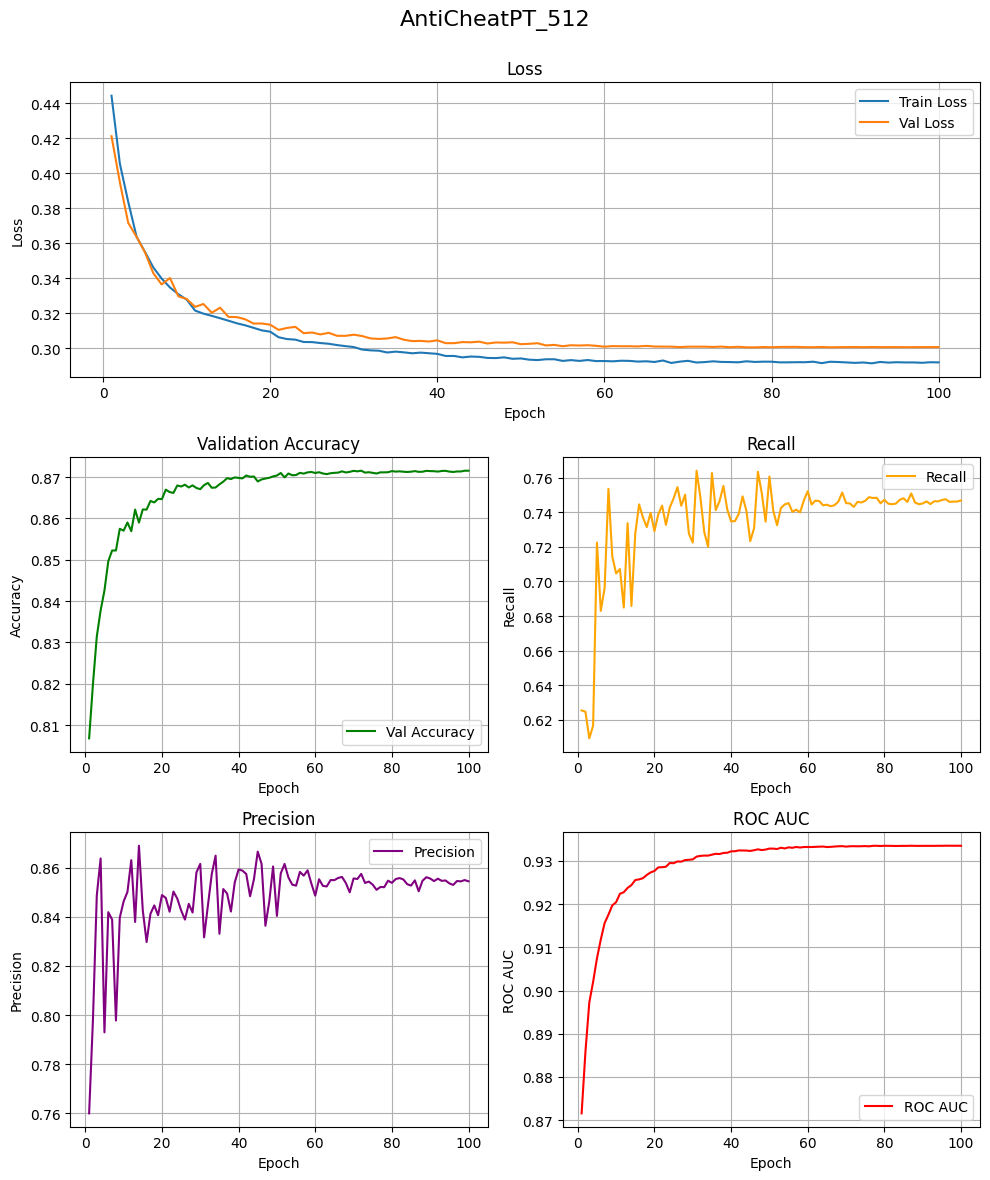

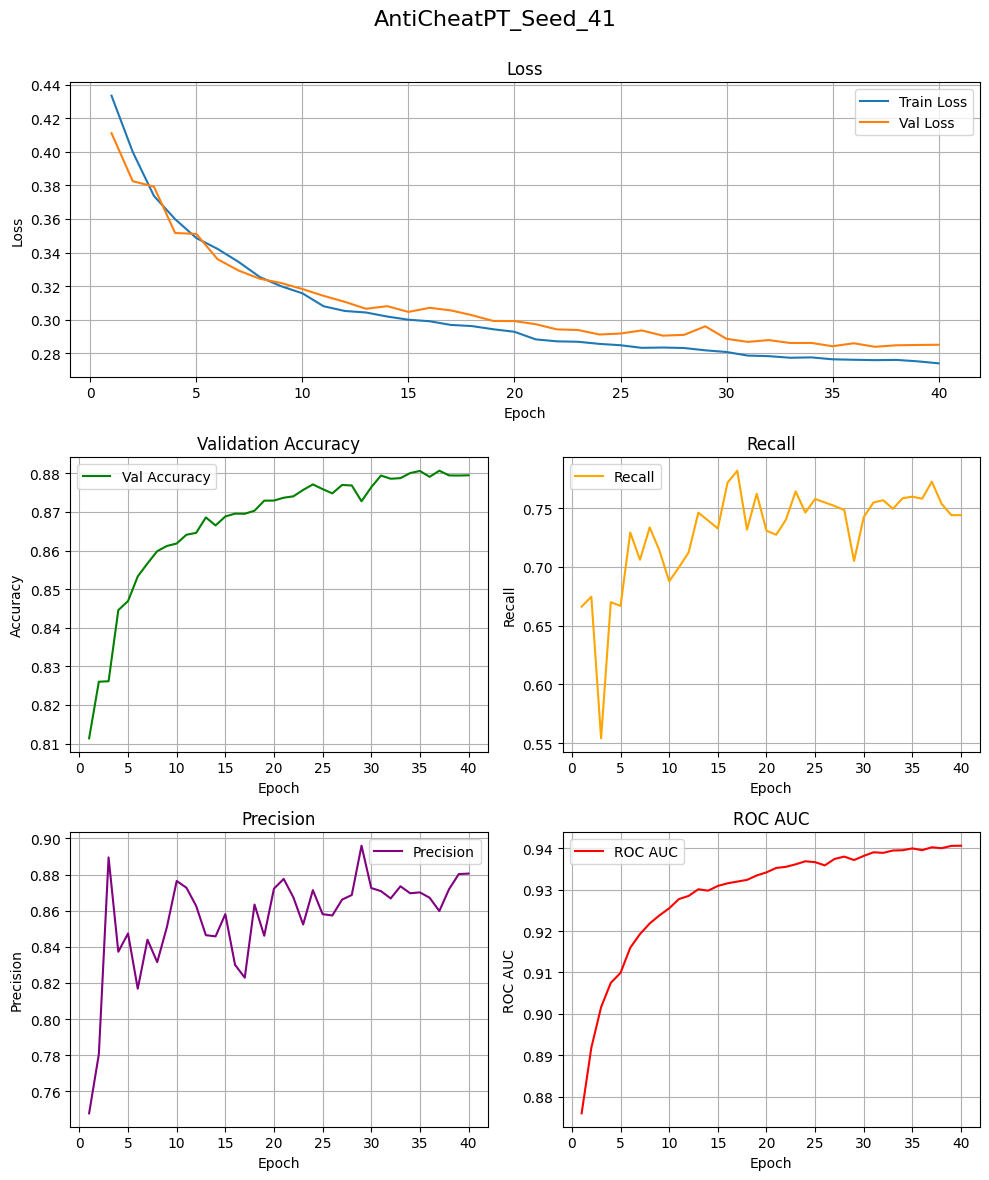

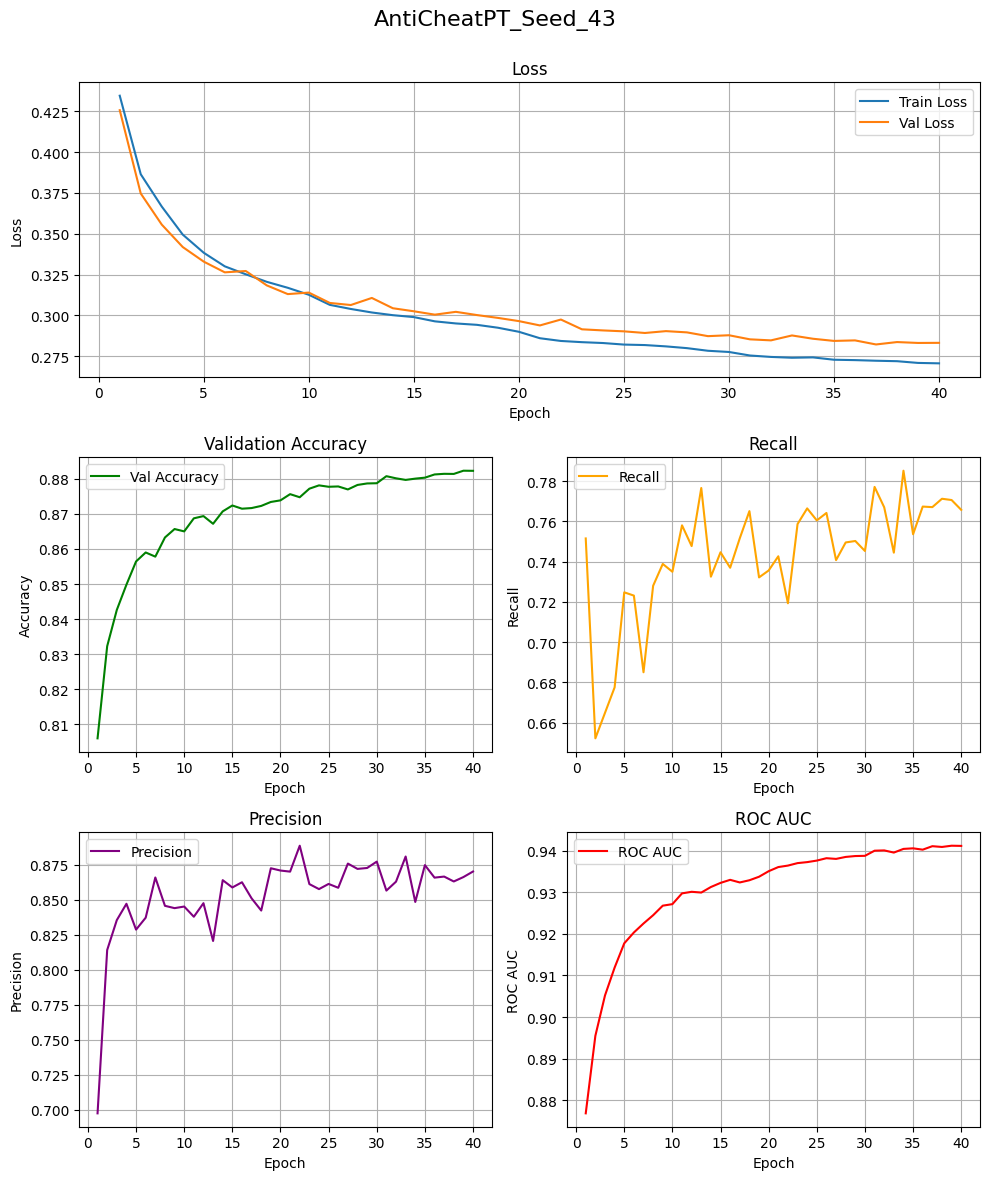

In [33]:
plot_metrics(metrics_1024, "AntiCheatPT_1024")
plot_metrics(metrics_512, "AntiCheatPT_512")
plot_metrics(metrics_1024_seed41, "AntiCheatPT_Seed_41")
plot_metrics(metrics_1024_seed43, "AntiCheatPT_Seed_43")